# Задание 1

Реализуйте стохастический градиентный спуск для решения линейной регрессии. Исследуйте сходимость с разным размером батча (1 - SGD, 2, $\ldots$, $n - 1$ - Minibatch GD, $n$ - GD из предыдущей работы).

## Реализация

In [153]:
import math
import numpy as np
from tqdm import tqdm

CNST_DPI_HQ = 1024

# def exp_decay(epoch, initial_lrate=0.1, n=2):
#    k = 0.005
#    return initial_lrate * math.exp(-k * (epoch // n))

def exp_decay(epoch, initial_lrate=0.1):
  return math.exp(-0.05 * (epoch + 10))

def const_decay(_, initial_lrate=0.3):
   return initial_lrate

In [154]:
import random
from helper import *

def stochastic_gradient_descent(f, initial_point, learning_rate_func, learning_rate=0.1, max_epochs=1000, minimum = 0.0, epsilon=0.1, batch_size=1):
    """
    Cтохастический градиентный спуск для поиска минимума функции c learning rate scheduling.

    Аргументы:
        f (function): Изначальная функция.
        grad_fn (function): Функция, которая принимает точку и возвращает градиент в этой точке.
        initial_point (list): Начальную точка, с которой начинается поиск.
        learning_rate_func (function): learning rate scheduling function.
        learning_rate (float): Скорость обучения или шаг градиентного спуска.
        max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
        minimum (float): Минимум функции.
        epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        batch_size (int): кол-во координат по которым вычисляется градиент
    Возвращает:
        Число пройденных шагов.
    """

    batch_size = min(batch_size, len(initial_point))

    current_point = initial_point.copy()
    current_value = f(current_point)
    values = [current_value]
    lr_values = [learning_rate_func(0, learning_rate)]
    
    for epoch in range(max_epochs):
        # if abs(current_value - minimum) < epsilon:
        #     break

        prev_point = np.copy(current_point)

        for _ in range(batch_size):
            random_index = random.randint(0, len(current_point)-1) 
            gradient_random_index = fast_gradient(f, current_point, random_index) 
            current_point[random_index] -= learning_rate_func(epoch, learning_rate) * gradient_random_index

        new_value = f(current_point)
        values.append(new_value)
        lr_values.append(learning_rate_func(epoch, learning_rate))

        if new_value < current_value:
            current_value = new_value
        else:
            current_point = prev_point

    return values, lr_values

In [155]:
def compare_const_decay_with_exp_decay(f, lr_step_size=1e-1, max_epochs=100, filename='', filename_extension='.png', dpi=CNST_DPI_HQ):
    # ================ configuration
    lr_values = np.arange(0, 100, lr_step_size)
    x0 = np.array([0, 0], dtype=float)
    batch_size = 2
    learning_rate_functions = [const_decay, exp_decay]
    initial_learning_rate = 0.08
    labels = ['Constant',
              'Exponential']
    # =============================
    
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss function value', fontsize=14)

    for i in range(2):
        learning_rate_function = learning_rate_functions[i]

        loss_values, lr_values = stochastic_gradient_descent(f, x0, learning_rate_function, learning_rate=initial_learning_rate, max_epochs=max_epochs, batch_size=batch_size)

        plt.plot(list(range(max_epochs + 1)), loss_values, label=labels[i])
        plt.plot(list(range(max_epochs + 1)), lr_values, label=f'lr_{labels[i]}', alpha=0.5, linewidth=0.4)
        
    
    if(filename != ''):
        plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

    plt.legend()
    plt.show()

## Тестирование и отладка

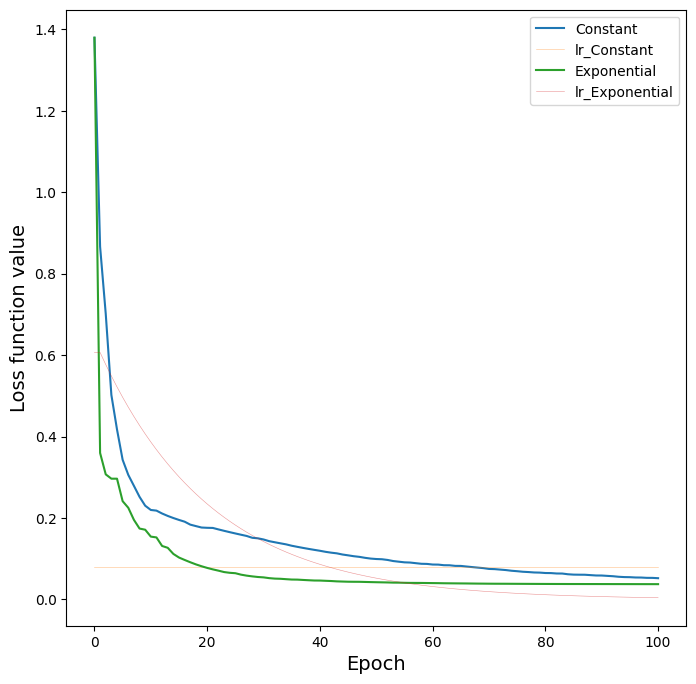

In [156]:
def mse_loss(x):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        mse = np.mean((y - y_pred) ** 2)
        return mse

# ======== style-parameters
plt.style.use('default')
_ = plt.figure(figsize=(8, 8))
# =========================

# Генерируем случайные точки
real_weight, real_bias = 2, 0

dots_count = 5000
variance = 0.5
X = np.random.rand(dots_count, 1)
y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)

compare_const_decay_with_exp_decay(mse_loss)


In [29]:
def mse_loss(x):
        weights, bias = x[0], x[1]
        y_pred = np.dot(X, weights) + bias
        mse = np.mean((y - y_pred) ** 2)
        return mse


# ======== style-parameters
plt.style.use('default')
_ = plt.figure(figsize=(8, 8))
# =========================

# Генерируем случайные точки
real_weight, real_bias = 2, 0

dots_count = 500
variance = 3
X = np.random.rand(dots_count, 1)
y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)

lr = 45
batch_size = 2
max_epochs = 10_000
x0 = np.array([0, 0], dtype=float)
epsilon = 1e-1
    
const = stochastic_gradient_descent(mse_loss, x0, const_decay, learning_rate=lr, max_epochs=max_epochs, epsilon=epsilon, batch_size=batch_size)
exp = stochastic_gradient_descent(mse_loss, x0, exp_decay, learning_rate=lr, max_epochs=max_epochs, batch_size=batch_size)

print(f'Constant vs Exponential\nLR: {lr}\nConst: {const}\nExponential: {exp}')

Constant vs Exponential
LR: 45
Const: ([2.115512993427599, 878096.5258616157, 61279353.64134544, 4593614.648591819, 4593614.648591819, 878096.5258616157, 6151915.644568017, 6151915.644568017, 878096.5258616157, 878096.5258616157, 4593614.648591819, 61279353.64134544, 61279353.64134544, 878096.5258616157, 878096.5258616157, 6151915.644568017, 878096.5258616157, 4593614.648591819, 878096.5258616157, 61279353.64134544, 4593614.648591819, 6151915.644568017, 6151915.644568017, 4593614.648591819, 878096.5258616157, 4593614.648591819, 61279353.64134544, 6151915.644568017, 878096.5258616157, 61279353.64134544, 878096.5258616157, 6151915.644568017, 61279353.64134544, 878096.5258616157, 878096.5258616157, 878096.5258616157, 878096.5258616157, 61279353.64134544, 878096.5258616157, 878096.5258616157, 878096.5258616157, 878096.5258616157, 6151915.644568017, 61279353.64134544, 6151915.644568017, 61279353.64134544, 6151915.644568017, 4593614.648591819, 6151915.644568017, 4593614.648591819, 4593614.64

<Figure size 800x800 with 0 Axes>